---

# Análisis de datos archivo Conversión Leads Haulmer

Por : Christian Vergara Retamal - Benjamín Sánchez Aliste
      

El siguiente archivo fué proporcionado por x perteneciente al equipo/área de x en Haulmer. Los datos dispuestos se obtienen desde el proceso de x con los clientes, en el cuál se detallan las siguientes variables : 

*   Clave : 
*   Email : Correo electrónico del cliente referenciado
*   Categoría Lead : Referente a las categorías internas de segmentación de llamados, las cuales pueden tomar los siguientes valores :

    1. Solicitud de Llamado 
    2. LFE TUU
    3. Interno..

*   Responsable : Ejecutivo de Haulmer responsable de contacto con cliente
*   Estado : Estado de la conversión 
*   Creada : Fecha Creación
*   Producto : Producto que ofrece Haulmer del interés del respectivo cliente
*   Periodo : Año/Mes
*   Fecha corta : Fecha registro
*   Categoría : Equivalente Categoría Lead
*   Estado 2 : Cliente contactado / no contactado
*   Semana : Relacionado a fecha
*   Día Semana : Relacionado a fecha 




---

## Aspectos Computacionales

**Librerías utilizadas para el funcionamiento del notebook**

* numpy  versión 1.21.6 : Álgebra lineal y matemáticas
* pandas versión 1.3.5 : Manejo y análisis de estructuras de datos
* seaborn versión 0.11.2 : Visualización de gráficos
* matplotlib 3.2.2 : Gráficos
* Scikit-learn 1.0.2 : Machine Learning

---

## Preparación Ambiente de Trabajo

In [45]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

### Importación y observación del set de datos

In [8]:
# Datos de ConversionLeads Haulmer
data = pd.read_csv("/content/drive/MyDrive/Datos/Datos Tesis/ConversiónLeadsOrigen.csv")

In [9]:
# Las columnas del set de datos
data.columns

Index(['Clave', 'Email', 'Categoría Lead', 'Responsable', 'Estado', 'Creada',
       'Producto', 'Periodo', 'Fecha Corta', 'Categoría', 'Estado 2', 'Semana',
       'Día Semana'],
      dtype='object')

In [10]:
# Muestra del conjunto de datos
data.sample(5)

,Clave,Email,Categoría Lead,Responsable,Estado,Creada,Producto,Periodo,Fecha Corta,Categoría,Estado 2,Semana,Día Semana
4170,ST-78020,Spalavecino@rasa.cl,Solicitud de Llamado,katherine araceli garrido urrutia,GANADO,15/03/2022 10:09:04,NaN,2022/03,15/3/2022,Solicitud de Llamado,Contactado,12.0,2.0
21447,ST-54850,cfam224@gmail.com,Interno,Fernando Muñoz,ACCIONES DE REMARKETING,22/06/2021 15:48:35,NaN,2021/06,22/6/2021,Interno,Contactado,26.0,2.0
36345,ST-39011,le.jah.spa@gmail.com,NaN,Juan Acuña,EN NEGOCIACIÓN,22/02/2021 18:12:41,NaN,2021/02,22/2/2021,Solicitud de Llamado,Contactado,9.0,1.0
43026,ST-32192,valentinasandoval89@gmail.com,Solicitud de Llamado,María José Navarro,ACCIONES DE REMARKETING,20/01/2021 21:45:51,NaN,2021/01,20/1/2021,Solicitud de Llamado,Contactado,4.0,3.0
8988,ST-72546,munaydelmar@gmail.com,LFE SimpleBoleta,Nicolas Ceresuela Fuentes,Lección Aprendida,16/01/2022 7:30:02,Simpleboleta,2022/01,16/1/2022,LFE SimpleBoleta,Contactado,3.0,7.0


In [11]:
# Cantidad de filas y columnas
print("El dataframe anime consta de {} atributos (columnas) y {} registros (filas)".format(data.shape[1], data.shape[0]))

El dataframe anime consta de 13 atributos (columnas) y 46760 registros (filas)


## Análisis descriptivo

In [13]:
# Cantidad de registros por columna y tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46760 entries, 0 to 46759
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Clave           46760 non-null  object 
 1   Email           46760 non-null  object 
 2   Categoría Lead  36690 non-null  object 
 3   Responsable     46760 non-null  object 
 4   Estado          46760 non-null  object 
 5   Creada          46760 non-null  object 
 6   Producto        6648 non-null   object 
 7   Periodo         44261 non-null  object 
 8   Fecha Corta     44261 non-null  object 
 9   Categoría       44261 non-null  object 
 10  Estado 2        44261 non-null  object 
 11  Semana          44261 non-null  float64
 12  Día Semana      44261 non-null  float64
dtypes: float64(2), object(11)
memory usage: 4.6+ MB


In [15]:
# Descripción de los datos numéricos
data.describe()

,Semana,Día Semana
count,44261.000000,44261.000000
mean,18.730462,3.094779
std,14.339024,1.679502
min,1.000000,1.000000
25%,8.000000,2.000000
50%,13.000000,3.000000
75%,26.000000,4.000000
max,53.000000,7.000000


In [17]:
# Descripción de los datos categóricos
data.describe(include = "object")

,Clave,Email,Categoría Lead,Responsable,Estado,Creada,Producto,Periodo,Fecha Corta,Categoría,Estado 2
count,46760,46760,36690,46760,46760,46760,6648,44261,44261,44261,44261
unique,46760,33215,25,34,11,38174,5,16,466,18,2
top,ST-82811,no,Solicitud de Llamado,Nicolas Ceresuela Fuentes,ACCIONES DE REMARKETING,29/12/2021 7:30:01,Tuu,2021/02,1/3/2021,Solicitud de Llamado,Contactado
freq,1,403,6976,8380,17848,51,3759,6757,557,15673,43945


In [23]:
# Verificación de datos nulos por columna
data.isna().sum()

Clave                 0
Email                 0
Categoría Lead    10070
Responsable           0
Estado                0
Creada                0
Producto          40112
Periodo            2499
Fecha Corta        2499
Categoría          2499
Estado 2           2499
Semana             2499
Día Semana         2499
dtype: int64

## Análisis Univariado de atributos

### Variables numéricas

In [20]:
# Obtención de columnas numéricas del set de datos
columnas_numericas = data.select_dtypes(include = ["float64", "int64"])

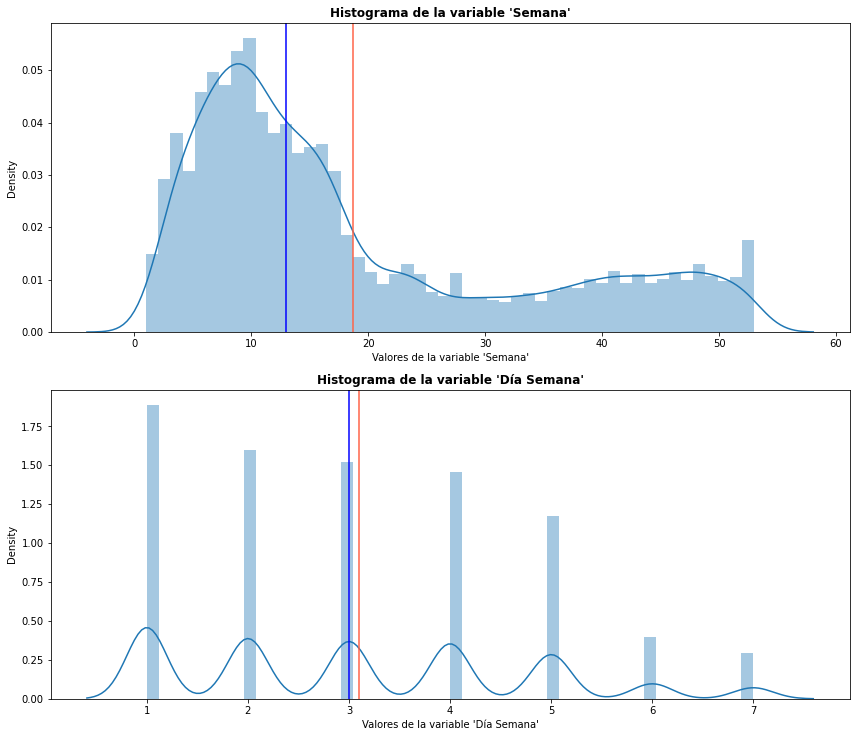

In [28]:
plt.figure(figsize=(12,15))
for index, col in enumerate(columnas_numericas):
    plt.subplot((len(list(columnas_numericas)))+1,1, index+1)
    titulo = str(f"Histograma de la variable '{col}'")
    texto_ejex = str(f"Valores de la variable '{col}'")
    
    if data[col].dtypes == "float64":
        sns.distplot(data[col])
        plt.axvline(data[col].mean(), color='tomato')
        plt.axvline(data[col].median(), color='blue')
        plt.title(titulo, weight='bold')
        plt.xlabel(texto_ejex)
        
    elif data[col].dtypes == "int64":
        sns.distplot(data[col], kde = False, bins = 50)
        plt.axvline(data[col].mean(), color='tomato')
        plt.axvline(data[col].median(), color='blue')
        plt.title(titulo, weight='bold')
        plt.xlabel(texto_ejex)
    plt.tight_layout()

### Variables categóricas

In [29]:
# Creación de función para visualizar frecuencia de valores que puede tomar el respectivo atributo
def plot_freq(df, col): 
  plt.figure(figsize=(10,8))
  aux_dict = df[col].value_counts().to_dict()
  y = list(aux_dict.values())
  plt.barh(*zip(*aux_dict.items()))
  for index, value in enumerate(y):
    plt.text(value, index, str(value))
  plt.title("Frecuencia de la columnas {}".format(col))
  plt.show()
  plt.tight_layout()

#### Atributo "Responsable"

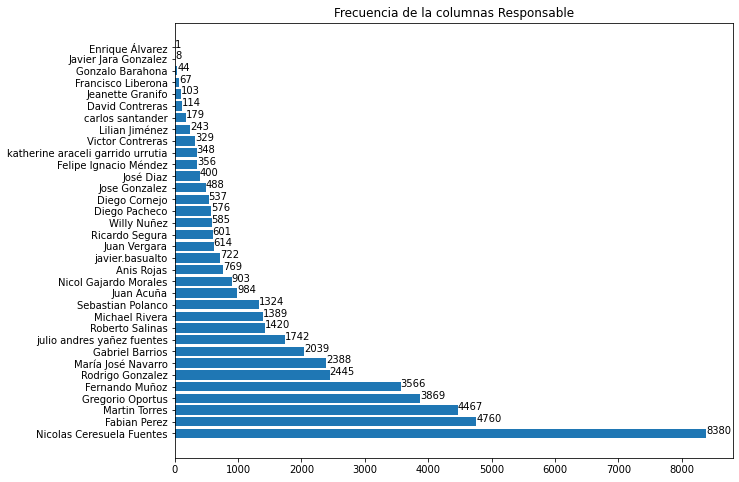

<Figure size 432x288 with 0 Axes>

In [32]:
plot_freq(data, "Responsable")

#### Atributo "Estado"

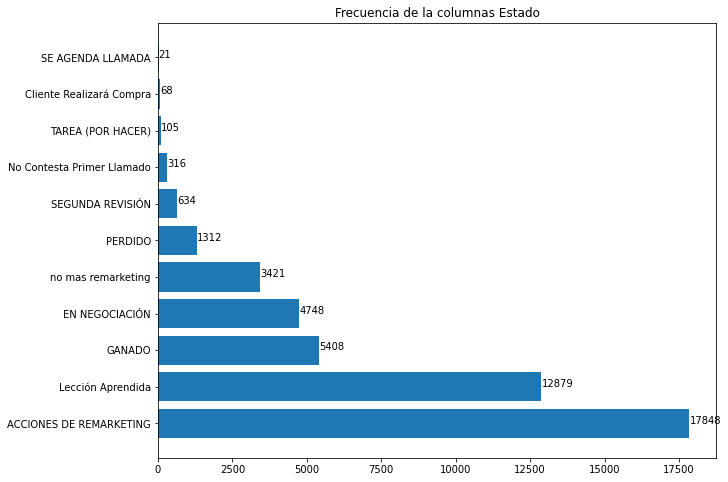

<Figure size 432x288 with 0 Axes>

In [33]:
plot_freq(data, "Estado")

#### Atributo "Producto"

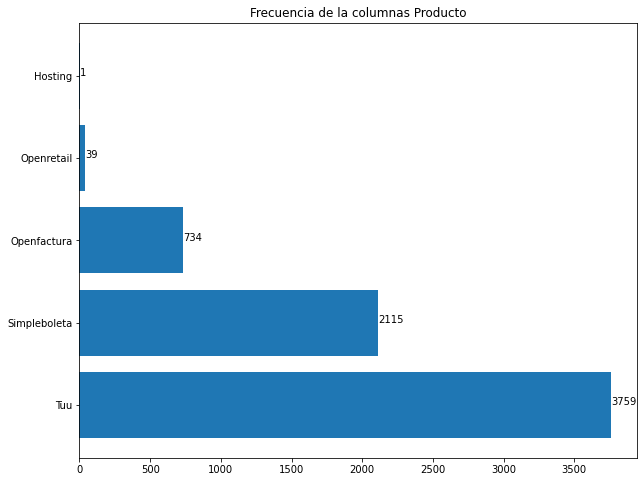

<Figure size 432x288 with 0 Axes>

In [34]:
plot_freq(data, "Producto")

#### Atributo "Categoría"

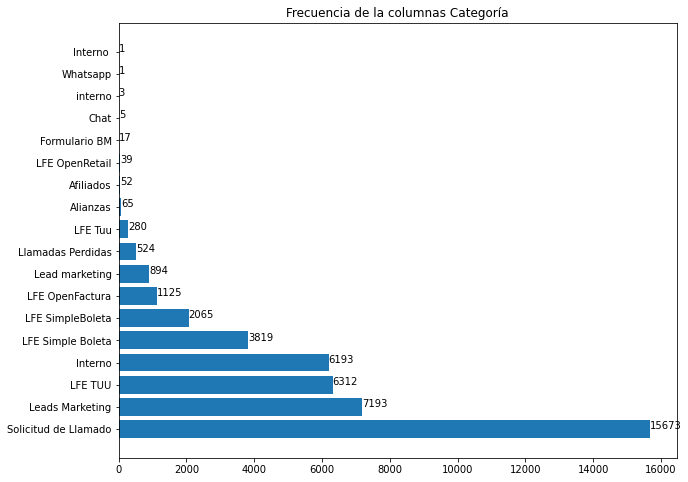

<Figure size 432x288 with 0 Axes>

In [37]:
 plot_freq(data, "Categoría")

Se observan que existen valores dentro de la columna "Categoría" que tienen el mismo significado, como lo es el caso del valor "Interno" o "LFE Simple Boleta", por lo que se modificarán los nombres de las categorías

In [39]:
# Se observan los valores que puede tomar categoría
data["Categoría"].value_counts().keys()

Index(['Solicitud de Llamado', 'Leads Marketing', 'LFE TUU', 'Interno',
       'LFE Simple Boleta', 'LFE SimpleBoleta', 'LFE OpenFactura',
       'Lead marketing', 'Llamadas Perdidas', 'LFE Tuu', 'Alianzas',
       'Afiliados', 'LFE OpenRetail', 'Formulario BM', 'Chat', 'interno',
       'Whatsapp', 'Interno '],
      dtype='object')

In [46]:
# Se transforman los datos para que esté todo en minúsculas
data["Categoría"] = data["Categoría"].str.lower()
# Se eliminan los espacios en los valores 
data["Categoría"] = data["Categoría"].str.replace(" ", "")

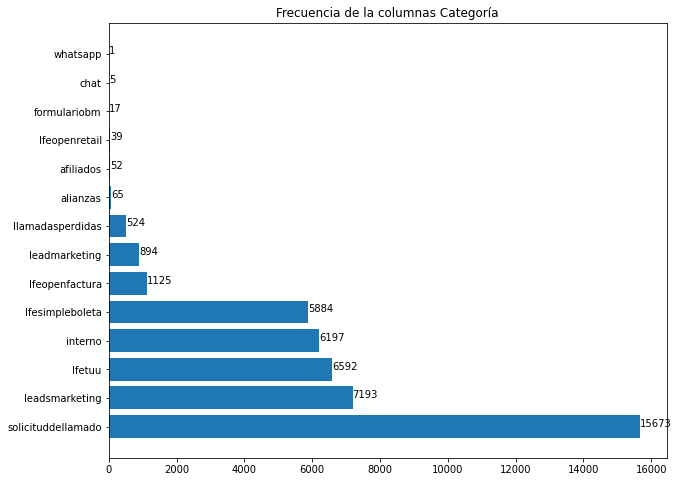

<Figure size 432x288 with 0 Axes>

In [44]:
 plot_freq(data, "Categoría")

#### Atributo "Estado 2"

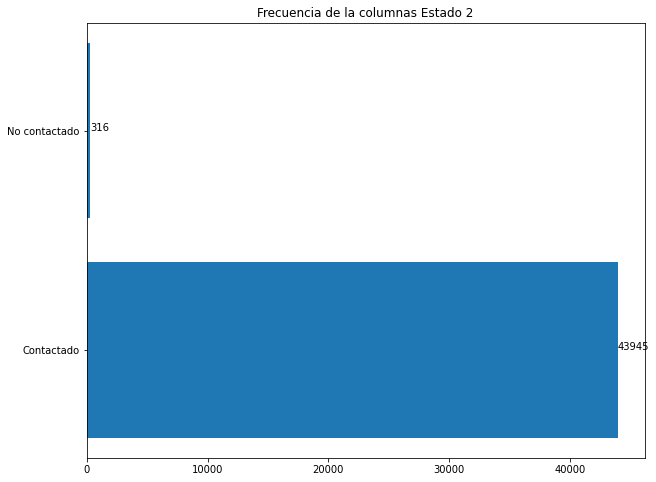

<Figure size 432x288 with 0 Axes>

In [47]:
 plot_freq(data, "Estado 2")